## Libraries
Verify you're on the same location as the anw_N and functions_definition files

In [116]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib
import multiprocessing

from qutip import *
import shutil
from functions_definition import *
from anw_N_data import main_data

# Main program
## 1. User-definded quantities

In [117]:
# Coupling constant C0
C0 = 1000
g=70 #[m^-1 W^(1/2)]: nonlinear constant
L=0.020 #[m]: length of active propagation region
Nmodes=9 # Number of modes. In this case, number of waveguides.
Ndim=5 #Define the number of dimensions of the Hilbert Space
z_points=200 #The amount of points from the propagation to analize
nruns = 1 #Times that the program is run

# The coupling profile coefficient list has the structure flist=[f1,f2,...,f_(N-1)]
#In this case, we decided to add disorder to the WGA by getting f_i from a random normal distribution
# with average = 1 and standard deviation of sigma (variable), like a percentage (~0.1 = 10%)
sigma = 0  # Standard deviation

#This is a list of tuples that describes the injection to the WGA
#Injection[i][0] represents the mode, going from  to N
#Injection[i][1] represents the absolute value of alpha
#Injection[i][2] is the phase

odd_phase = 0*np.pi/4


#injection_list = [(1,0, np.pi),(2,np.sqrt(0.0050), 0),(3,0, np.pi),(4,np.sqrt(0.0050), 0),(5,0, np.pi)]
#injection_list = [(1,np.sqrt(0.005), 0),(2,np.sqrt(0.005), np.pi/4),(3,np.sqrt(0.005), 0),(4,np.sqrt(0.005), np.pi/4),(5,np.sqrt(0.005), 0),(6,np.sqrt(0.005), np.pi/4),(7,np.sqrt(0.005), 0),(8,np.sqrt(0.005),np.pi/4),(9,np.sqrt(0.005),0),(10,np.sqrt(0.005),np.pi/4),(11,np.sqrt(0.005),0)]



injection_list_odd = [(i, np.sqrt(0.0005), odd_phase) for i in range(1,Nmodes+1, 2)]
injection_list_even = [(i, np.sqrt(0.0005), 0) for i in range(2,Nmodes+1,2)]


injection_list = injection_list_even+injection_list_odd
injection_list

[(2, 0.022360679774997897, 0),
 (4, 0.022360679774997897, 0),
 (6, 0.022360679774997897, 0),
 (8, 0.022360679774997897, 0),
 (1, 0.022360679774997897, 0.0),
 (3, 0.022360679774997897, 0.0),
 (5, 0.022360679774997897, 0.0),
 (7, 0.022360679774997897, 0.0),
 (9, 0.022360679774997897, 0.0)]

## 2. Locate the results folder

In [118]:
#Get current path
current_path = os.getcwd()

#Create folder where the calculation results are going to be stored
results_folder=f'results_C0_{int(C0)}p{int((round(C0,2)-int(C0))*100)}_sigma_{int(sigma)}p{int((round(sigma,2)-int(sigma))*100)}_N_{Nmodes}_odd_phase_{int(odd_phase)}_p_{int((round(odd_phase,2)-int(odd_phase))*100)}'
path_results_folder = os.path.join(current_path,results_folder)

In [119]:
try:
    os.mkdir(path_results_folder)

except FileExistsError:
   shutil.rmtree(path_results_folder)
   os.mkdir(path_results_folder)

## 3. Generating the data

In [120]:
# The data is generated calculating the evolved state the amount of times that the variable nruns indicates

for run in range(1,nruns+1):

    # Define the coupling profile coefficient list
    # The abs avoids negative values, but the distribution stays almost the same if sigma is small
    flist=[abs(np.random.normal(1,sigma)) for i in range(0,Nmodes)]
    #Parabolic profile array

    #flist=[np.sqrt(j*(Nmodes-j)/2) for j in range(1,Nmodes+1)]

    #Generates the data calculating the evolved state and extracting its information in every step L/zpoints
    main_data(current_path,path_results_folder,C0,flist, g, L, Nmodes,Ndim,z_points, injection_list, run)


No c_ops, using sesolve
10.4%. Run time:  35.81s. Est. time left: 00:00:05:06
20.4%. Run time:  70.39s. Est. time left: 00:00:04:34
30.3%. Run time: 103.89s. Est. time left: 00:00:03:58
40.3%. Run time: 139.89s. Est. time left: 00:00:03:27
50.2%. Run time: 185.27s. Est. time left: 00:00:03:03
60.2%. Run time: 229.58s. Est. time left: 00:00:02:31
70.1%. Run time: 273.27s. Est. time left: 00:00:01:56
80.1%. Run time: 316.20s. Est. time left: 00:00:01:18
90.0%. Run time: 360.39s. Est. time left: 00:00:00:39
Total run time: 402.55s


## 4. Process the data

In [121]:
os.chdir(path_results_folder)

In [122]:
df = pd.DataFrame()
for run in range(1,nruns+1):
    df_i = pd.read_csv(f'results_nrun_{run}.csv')
    for column in list(df_i.columns):
        if column != '0.0' and column != 'f':
            df_i[column] = df_i[column]/df_i[column].sum()

    #df_i.set_index('Unnamed: 0', inplace=True)
    #df_i.index.name = 'z'
    df = pd.concat([df,df_i])


In [123]:
df = df.drop('f',axis=1)
df

,0.0,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,...,0.0191,0.0192,0.0193,0.0194,0.0195,0.0196,0.0197,0.0198,0.0199,0.02
0,0.0,0.111666,0.112547,0.114041,0.116140,0.118856,0.122202,0.126181,0.130786,0.135981,...,0.199603,0.199637,0.199670,0.199698,0.199719,0.199729,0.199728,0.199714,0.199691,0.199661
1,0.0,0.110956,0.110693,0.110237,0.109563,0.108634,0.107401,0.105804,0.103775,0.101242,...,0.000711,0.000666,0.000634,0.000618,0.000616,0.000627,0.000647,0.000674,0.000702,0.000727
2,0.0,0.110951,0.110704,0.110289,0.109720,0.109008,0.108172,0.107239,0.106250,0.105263,...,0.198964,0.199032,0.199093,0.199147,0.199195,0.199237,0.199274,0.199308,0.199339,0.199369
3,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107183,0.106125,0.105006,...,0.001422,0.001257,0.001094,0.000939,0.000797,0.000671,0.000565,0.000481,0.000419,0.000378
4,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107185,0.106129,0.105016,...,0.198600,0.198817,0.199016,0.199194,0.199347,0.199472,0.199572,0.199646,0.199698,0.199731
5,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107183,0.106125,0.105006,...,0.001422,0.001257,0.001094,0.000939,0.000797,0.000671,0.000565,0.000481,0.000419,0.000378
6,0.0,0.110951,0.110704,0.110289,0.109720,0.109008,0.108172,0.107239,0.106250,0.105263,...,0.198964,0.199032,0.199093,0.199147,0.199195,0.199237,0.199274,0.199308,0.199339,0.199369
7,0.0,0.110956,0.110693,0.110237,0.109563,0.108634,0.107401,0.105804,0.103775,0.101242,...,0.000711,0.000666,0.000634,0.000618,0.000616,0.000627,0.000647,0.000674,0.000702,0.000727
8,0.0,0.111666,0.112547,0.114041,0.116140,0.118856,0.122202,0.126181,0.130786,0.135981,...,0.199603,0.199637,0.199670,0.199698,0.199719,0.199729,0.199728,0.199714,0.199691,0.199661


In [124]:
av_df = df.groupby(df.index).mean()
av_df

,0.0,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,...,0.0191,0.0192,0.0193,0.0194,0.0195,0.0196,0.0197,0.0198,0.0199,0.02
0,0.0,0.111666,0.112547,0.114041,0.116140,0.118856,0.122202,0.126181,0.130786,0.135981,...,0.199603,0.199637,0.199670,0.199698,0.199719,0.199729,0.199728,0.199714,0.199691,0.199661
1,0.0,0.110956,0.110693,0.110237,0.109563,0.108634,0.107401,0.105804,0.103775,0.101242,...,0.000711,0.000666,0.000634,0.000618,0.000616,0.000627,0.000647,0.000674,0.000702,0.000727
2,0.0,0.110951,0.110704,0.110289,0.109720,0.109008,0.108172,0.107239,0.106250,0.105263,...,0.198964,0.199032,0.199093,0.199147,0.199195,0.199237,0.199274,0.199308,0.199339,0.199369
3,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107183,0.106125,0.105006,...,0.001422,0.001257,0.001094,0.000939,0.000797,0.000671,0.000565,0.000481,0.000419,0.000378
4,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107185,0.106129,0.105016,...,0.198600,0.198817,0.199016,0.199194,0.199347,0.199472,0.199572,0.199646,0.199698,0.199731
5,0.0,0.110951,0.110704,0.110288,0.109718,0.109001,0.108150,0.107183,0.106125,0.105006,...,0.001422,0.001257,0.001094,0.000939,0.000797,0.000671,0.000565,0.000481,0.000419,0.000378
6,0.0,0.110951,0.110704,0.110289,0.109720,0.109008,0.108172,0.107239,0.106250,0.105263,...,0.198964,0.199032,0.199093,0.199147,0.199195,0.199237,0.199274,0.199308,0.199339,0.199369
7,0.0,0.110956,0.110693,0.110237,0.109563,0.108634,0.107401,0.105804,0.103775,0.101242,...,0.000711,0.000666,0.000634,0.000618,0.000616,0.000627,0.000647,0.000674,0.000702,0.000727
8,0.0,0.111666,0.112547,0.114041,0.116140,0.118856,0.122202,0.126181,0.130786,0.135981,...,0.199603,0.199637,0.199670,0.199698,0.199719,0.199729,0.199728,0.199714,0.199691,0.199661


In [125]:
df_plot = av_df.transpose()
#Normalizing
df_plot['C0z'] = np.array([C0*float(z) for z in df_plot.index.tolist()])
df_plot.set_index('C0z', inplace=True)
df_plot

,0,1,2,3,4,5,6,7,8
C0z,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.111666,0.110956,0.110951,0.110951,0.110951,0.110951,0.110951,0.110956,0.111666
0.2,0.112547,0.110693,0.110704,0.110704,0.110704,0.110704,0.110704,0.110693,0.112547
0.3,0.114041,0.110237,0.110289,0.110288,0.110288,0.110288,0.110289,0.110237,0.114041
0.4,0.116140,0.109563,0.109720,0.109718,0.109718,0.109718,0.109720,0.109563,0.116140
...,...,...,...,...,...,...,...,...,...
19.6,0.199729,0.000627,0.199237,0.000671,0.199472,0.000671,0.199237,0.000627,0.199729
19.7,0.199728,0.000647,0.199274,0.000565,0.199572,0.000565,0.199274,0.000647,0.199728
19.8,0.199714,0.000674,0.199308,0.000481,0.199646,0.000481,0.199308,0.000674,0.199714


## Making some plots about the propagation

In [126]:
df_plot = av_df.transpose()
#Normalizing
df_plot['C0z'] = np.array([C0*float(z) for z in df_plot.index.tolist()])
df_plot.set_index('C0z', inplace=True)
#Changing the name of the modes to 0 being the center
"""change_index = dict.fromkeys(df_plot.columns.tolist())
for index in df_plot.columns.tolist():
    change_index[index] = int(index-Nmodes/2)"""
#Changing the name of the modes to start from 1
change_index = dict.fromkeys(df_plot.columns.tolist())
for index in df_plot.columns.tolist():
    change_index[index] = int(index+1)
df_plot.rename(columns=change_index, inplace=True)
df_plot


,1,2,3,4,5,6,7,8,9
C0z,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.111666,0.110956,0.110951,0.110951,0.110951,0.110951,0.110951,0.110956,0.111666
0.2,0.112547,0.110693,0.110704,0.110704,0.110704,0.110704,0.110704,0.110693,0.112547
0.3,0.114041,0.110237,0.110289,0.110288,0.110288,0.110288,0.110289,0.110237,0.114041
0.4,0.116140,0.109563,0.109720,0.109718,0.109718,0.109718,0.109720,0.109563,0.116140
...,...,...,...,...,...,...,...,...,...
19.6,0.199729,0.000627,0.199237,0.000671,0.199472,0.000671,0.199237,0.000627,0.199729
19.7,0.199728,0.000647,0.199274,0.000565,0.199572,0.000565,0.199274,0.000647,0.199728
19.8,0.199714,0.000674,0.199308,0.000481,0.199646,0.000481,0.199308,0.000674,0.199714


/tmp/ipykernel_7131/431429972.py:2: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  plt.yticks(np.arange(0.5, len(df_plot.index), z_points/5), [round(df_plot.index[i]) for i in np.arange(0, len(df_plot.index), z_points/5)])


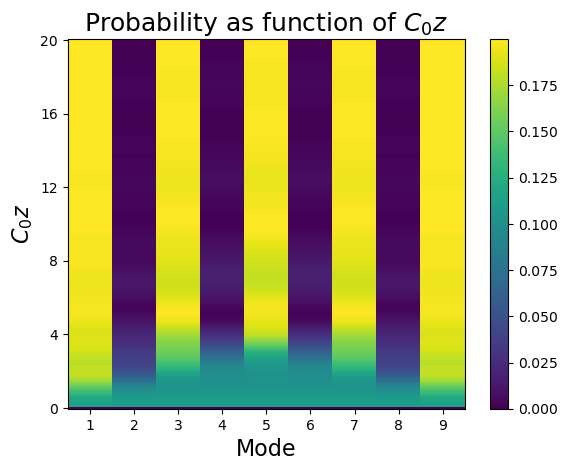

In [127]:
plt.pcolor(df_plot)
plt.yticks(np.arange(0.5, len(df_plot.index), z_points/5), [round(df_plot.index[i]) for i in np.arange(0, len(df_plot.index), z_points/5)])
plt.xticks(np.arange(0.5, len(df_plot.columns), 1), df_plot.columns.to_list()) #np.arange(1, len(df_plot.columns)+1, 1)
plt.xlabel(r'Mode', fontsize=16)
plt.ylabel(r'$C_0z$', fontsize=16)
plt.title(r'Probability as function of $C_0z$', fontsize=18)
plt.colorbar()
plt.savefig(f'{path_results_folder}/propagation_n_{Nmodes}')
plt.show()

In [128]:
df_plot_2 = df_plot.copy()
df_plot_2

,1,2,3,4,5,6,7,8,9
C0z,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.111666,0.110956,0.110951,0.110951,0.110951,0.110951,0.110951,0.110956,0.111666
0.2,0.112547,0.110693,0.110704,0.110704,0.110704,0.110704,0.110704,0.110693,0.112547
0.3,0.114041,0.110237,0.110289,0.110288,0.110288,0.110288,0.110289,0.110237,0.114041
0.4,0.116140,0.109563,0.109720,0.109718,0.109718,0.109718,0.109720,0.109563,0.116140
...,...,...,...,...,...,...,...,...,...
19.6,0.199729,0.000627,0.199237,0.000671,0.199472,0.000671,0.199237,0.000627,0.199729
19.7,0.199728,0.000647,0.199274,0.000565,0.199572,0.000565,0.199274,0.000647,0.199728
19.8,0.199714,0.000674,0.199308,0.000481,0.199646,0.000481,0.199308,0.000674,0.199714


In [129]:
def spread(row):
    # Obtener los nombres de las columnas numericas
    num_cols = [col for col in row.index]
    # Calcular el spread sumando los valores de las columnas multiplicados por su nombre numerico
    spread_sq = sum(row[col]*(int(col)**2) for col in num_cols)
    mean = sum(row[col]*int(col) for col in num_cols)
    return np.sqrt(spread_sq-mean**2)

# Aplicar la función a cada fila del DataFrame
df_plot_2['Spread'] = df_plot.apply(spread, axis=1)
df_plot_2

,1,2,3,4,5,6,7,8,9,Spread
C0z,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.111666,0.110956,0.110951,0.110951,0.110951,0.110951,0.110951,0.110956,0.111666,2.584576
0.2,0.112547,0.110693,0.110704,0.110704,0.110704,0.110704,0.110704,0.110693,0.112547,2.588636
0.3,0.114041,0.110237,0.110289,0.110288,0.110288,0.110288,0.110289,0.110237,0.114041,2.595472
0.4,0.116140,0.109563,0.109720,0.109718,0.109718,0.109718,0.109720,0.109563,0.116140,2.604962
...,...,...,...,...,...,...,...,...,...,...
19.6,0.199729,0.000627,0.199237,0.000671,0.199472,0.000671,0.199237,0.000627,0.199729,2.828048
19.7,0.199728,0.000647,0.199274,0.000565,0.199572,0.000565,0.199274,0.000647,0.199728,2.828119
19.8,0.199714,0.000674,0.199308,0.000481,0.199646,0.000481,0.199308,0.000674,0.199714,2.828146


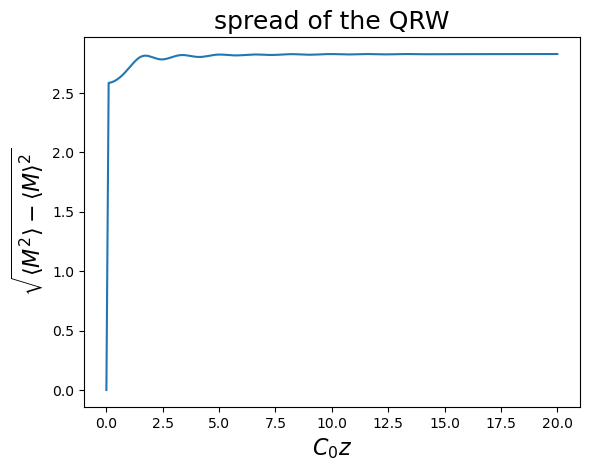

In [130]:
df_plot_2['Spread'].plot()
plt.title('spread of the QRW', fontsize=18)
plt.xlabel(r'$C_0z$', fontsize=16)
plt.ylabel(r'$\sqrt{\langle M^2 \rangle-\langle M\rangle^2}$', fontsize=16)
plt.savefig(f'{path_results_folder}/spread_n_{Nmodes}')
plt.show()

In [131]:
os.chdir(current_path)
os.getcwd()

'/home/oem/Desktop/Física/Asistencia_CICIMA/QRW'

In [132]:
os.chdir('/home/oem/Desktop/Física/Asistencia_CICIMA/QRW')
os.getcwd()

'/home/oem/Desktop/Física/Asistencia_CICIMA/QRW'

## Correlation matrix
This matrix is obtained plotting

$$\Gamma_{q,r}=\langle a^\dagger_q a^\dagger_r a_r a_q\rangle$$

As a function of $q$ and $r$. This is similar to the probability to detect at the output of the lattice exactly onephoton at waveguide $r$ and one photon at waveguide $q$ (it is in the case of only a pair of photons propagating in the WGA). If there are more than 2 photons, it is related to the expected value of the photons in waveguides $q$ and $r$ 

In [133]:
os.chdir(results_folder)

qutip_file_name = f'anw_n_{Nmodes}'

evolved_states=qload(qutip_file_name).states

output_evolved_state=evolved_states[-1]

#define annihilation operators for each mode
a_list = [destruction_operator_multimode(Ndim, Nmodes, mode) for mode in range(1,Nmodes+1)]
#define creation operators for each mode
a_dag_list=[creation_operator_multimode(Ndim, Nmodes, mode) for mode in range(1,Nmodes+1)]

In [134]:
correlation_matrix = np.zeros((Nmodes,Nmodes),dtype=complex)

for q in range(0,Nmodes):
    for r in range(0,Nmodes):
        if q!=r:
            correlation_matrix[q,r] = expect(a_dag_list[q]*a_dag_list[r]*a_list[q]*a_list[r],output_evolved_state)
        else:
            correlation_matrix[q,r] = expect(a_dag_list[q]*a_dag_list[r]*a_list[q]*a_list[r],output_evolved_state)/2

In [135]:
correlation_matrix = np.abs(correlation_matrix)
correlation_matrix

array([[7.67669091e-05, 1.18796829e-06, 1.48968419e-04, 1.47768975e-07,
        1.58090861e-04, 1.93966530e-07, 1.67121398e-04, 2.10104936e-07,
        1.66983416e-04],
       [1.18796829e-06, 1.75628289e-08, 5.01158183e-07, 1.36802319e-07,
        6.77315820e-07, 1.26434175e-07, 2.71196668e-09, 1.64440179e-10,
        2.10104936e-07],
       [1.48968419e-04, 5.01158183e-07, 8.13955225e-05, 7.28788251e-08,
        1.57737427e-04, 1.35158424e-07, 1.57953897e-04, 2.71196668e-09,
        1.67121398e-04],
       [1.47768975e-07, 1.36802319e-07, 7.28788251e-08, 1.45255415e-08,
        5.24159277e-07, 1.32811892e-07, 1.35158424e-07, 1.26434175e-07,
        1.93966530e-07],
       [1.58090861e-04, 6.77315820e-07, 1.57737427e-04, 5.24159277e-07,
        8.13280988e-05, 5.24159277e-07, 1.57737427e-04, 6.77315820e-07,
        1.58090861e-04],
       [1.93966530e-07, 1.26434175e-07, 1.35158424e-07, 1.32811892e-07,
        5.24159277e-07, 1.45255415e-08, 7.28788251e-08, 1.36802319e-07,
        1.4

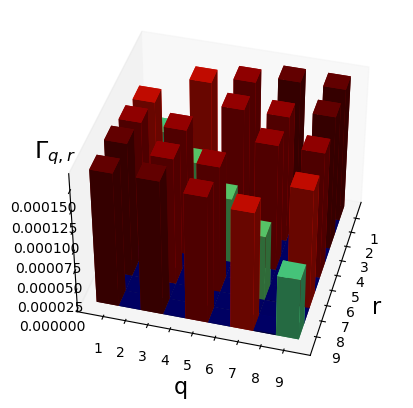

In [136]:

# Create x, y, and z coordinate arrays
x = np.arange(correlation_matrix.shape[1])
y = np.arange(correlation_matrix.shape[0])
X, Y = np.meshgrid(x, y)
Z = correlation_matrix

# Create a colormap
cmap = plt.cm.get_cmap('jet')

# Define the color mapping range
vmin = np.min(Z)
vmax = np.max(Z)

# Create a normalizer to map values to the colormap range
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

# Create the 3D bar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z).ravel(), 1, 1, Z.ravel(), color=cmap(norm(Z.ravel())))

ax.set_xlabel(r'r', fontsize = 16)
ax.set_ylabel(r'q', fontsize = 16)
#ax.set_zlabel(r'$\Gamma_{q,r}$')
ax.text2D(0, 0.6, r'$\Gamma_{q,r}$', transform=ax.transAxes, fontsize = 17)


# Set the viewing angle
ax.view_init(elev=40, azim=15)

# Adjust the axis tick positions and labels
ax.set_xticks(x + 0.5)
ax.set_xticklabels(x + 1)
ax.set_yticks(y + 0.5)
ax.set_yticklabels(y + 1)

# Remove the grid
ax.grid(False)

"""# XZ Projection
ax2 = fig.add_subplot(132)
ax2.imshow(correlation_matrix.T, origin='lower')

# YZ Projection
ax3 = fig.add_subplot(133)
ax3.imshow(correlation_matrix.T, origin='lower')"""
plt.savefig(f'{path_results_folder}/bar_plot_n_{Nmodes}')
plt.show()


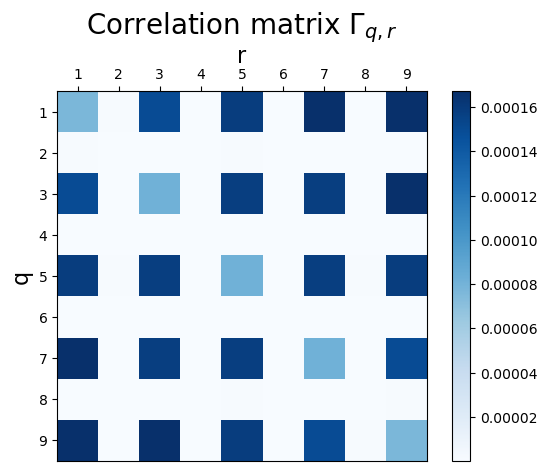

In [137]:
# Create a colormap
cmap = plt.cm.get_cmap('Blues')

# Create the heatmap
plt.imshow(correlation_matrix, cmap=cmap)
plt.colorbar()
plt.ylabel('q', fontsize=16)
plt.xlabel('r', fontsize=16)
#Put labels on top:
ax = plt.gca() #Access current axes
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
#Label starting from 1
plt.xticks(np.arange(correlation_matrix.shape[1]), np.arange(correlation_matrix.shape[1]) + 1)
plt.yticks(np.arange(correlation_matrix.shape[0]), np.arange(correlation_matrix.shape[0]) + 1)


plt.title(r'Correlation matrix $\Gamma_{q,r}$', fontsize=20)
plt.savefig(f'{path_results_folder}/correlatio_matrix_n_{Nmodes}')
plt.show()


In [138]:
os.chdir('/home/oem/Desktop/Física/Asistencia_CICIMA/QRW')
os.getcwd()

'/home/oem/Desktop/Física/Asistencia_CICIMA/QRW'